In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [243]:
df_charging = pd.read_pickle("data/charging_modified.pkl")

### 1) Time a car used a station without charging (in hours)

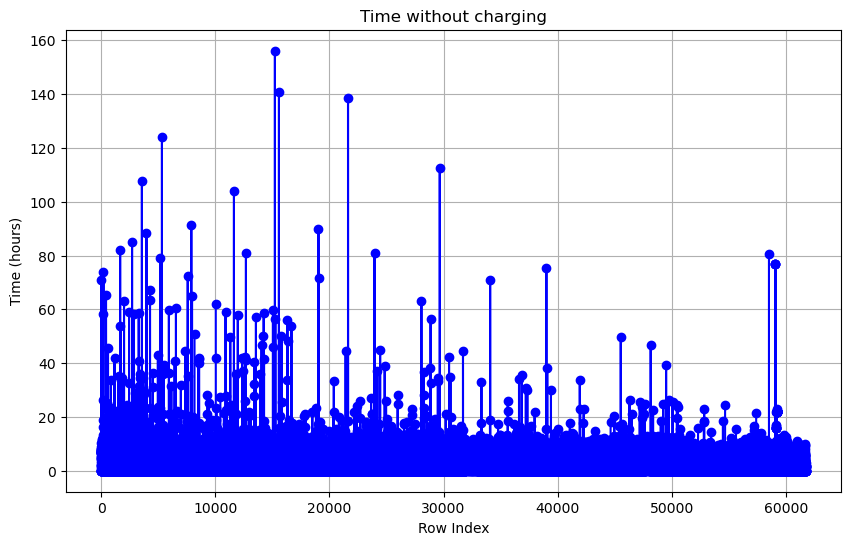

In [244]:
# Plot the time differences
plt.figure(figsize=(10, 6))
plt.plot(df_charging['NoChargingTimeHours'], marker='o', linestyle='-', color='b')
plt.title('Time without charging')
plt.xlabel('Row Index')
plt.ylabel('Time (hours)')
plt.grid(True)
plt.show()

In [245]:
print(df_charging['NoChargingTimeHours'].describe())

count    57643.000000
mean         3.083785
std          4.048385
min          0.000000
25%          0.156667
50%          2.040833
75%          5.197500
max        156.121389
Name: NoChargingTimeHours, dtype: float64


In [246]:
# Problem solved by dropping entries with negative values
# Old problem: negative values not possible -> doneChargingTime is later than disconnectTime
# Interesting: Values at 0 -> disconnectTime at the same time as doneChargingTime
df_charging[df_charging['NoChargingTimeHours'] == 0]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,NoChargingTime,...,kWhPerMinute,month,user_paymentRequired_values,user_requestedDeparture,user_modifiedAt,user_minutesAvailable,user_milesRequested,user_kWhRequested,user_WhPerMile,user_kWhRequestFulfilment
4140,5bc928ddf9af8b0dc677c743,2018-07-09 00:21:39+00:00,2018-07-09 06:16:09+00:00,2018-07-09 06:16:09+00:00,27.154000,2,CA-320,2-39-78-363,NaN,0 days,...,0.076598,7,None,None,None,NaN,NaN,NaN,NaN,NaN
9853,5bc93f06f9af8b0dc677dcfd,2018-09-20 18:21:06+00:00,2018-09-20 20:20:04+00:00,2018-09-20 20:20:04+00:00,3.584000,2,CA-323,2-39-78-366,NaN,0 days,...,0.030126,9,None,None,None,NaN,NaN,NaN,NaN,NaN
10941,5bc94221f9af8b0dc677dfeb,2018-09-29 22:03:35+00:00,2018-09-29 23:00:39+00:00,2018-09-29 23:00:39+00:00,6.815959,2,CA-323,2-39-78-366,NaN,0 days,...,0.119439,9,None,None,None,NaN,NaN,NaN,NaN,NaN
11886,5be2fc9df9af8b2b0edfa0ae,2018-10-08 00:36:11+00:00,2018-10-08 01:42:18+00:00,2018-10-08 01:42:18+00:00,7.191020,2,CA-323,2-39-78-366,NaN,0 days,...,0.108763,10,None,None,None,NaN,NaN,NaN,NaN,NaN
31000,5d06df21f9af8b49d101c5a4,2019-05-31 22:26:39+00:00,2019-06-01 00:24:47+00:00,2019-06-01 00:24:47+00:00,5.933000,2,CA-322,2-39-78-360,431.0,0 days,...,0.050223,5,True,"Sat, 01 Jun 2019 00:55:39 GMT","Fri, 31 May 2019 22:27:14 GMT",149.0,60.0,18.0,300.0,-12.067


### 2) Charging time per session (in hours)

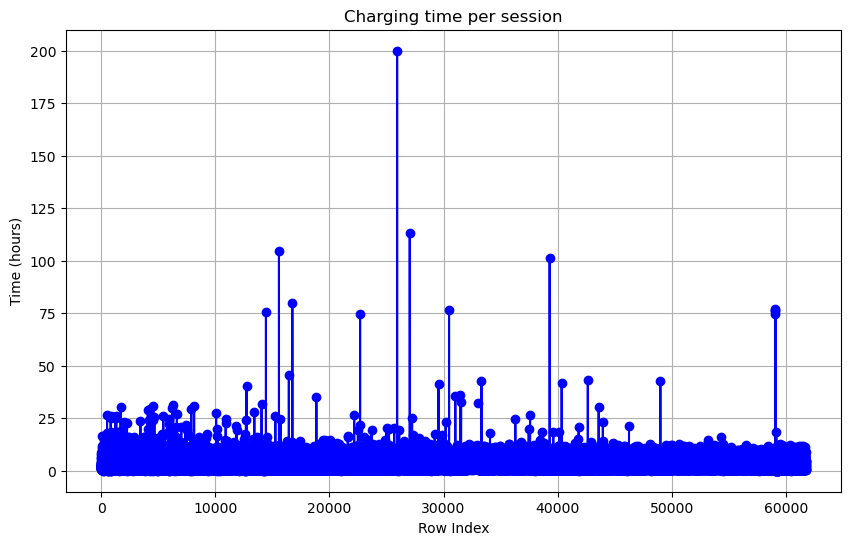

In [248]:
# Plot the time differences
plt.figure(figsize=(10, 6))
plt.plot(df_charging['ChargingTimeHours'], marker='o', linestyle='-', color='b')
plt.title('Charging time per session')
plt.xlabel('Row Index')
plt.ylabel('Time (hours)')
plt.grid(True)
plt.show()

In [249]:
print(df_charging['ChargingTimeHours'].describe())

count    57643.000000
mean         3.476721
std          2.955967
min          0.000000
25%          1.617222
50%          2.741667
75%          4.668333
max        200.015833
Name: ChargingTimeHours, dtype: float64


In [250]:
# Problem solved by dropping entries with negative values
# Old problem: negative values not possible -> connectTime is later than doneChargingTime
# Interesting: Values at 0 -> connectionTime at the same time as doneChargingTime
df_charging[df_charging['ChargingTimeHours'] == 0]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,NoChargingTime,...,kWhPerMinute,month,user_paymentRequired_values,user_requestedDeparture,user_modifiedAt,user_minutesAvailable,user_milesRequested,user_kWhRequested,user_WhPerMile,user_kWhRequestFulfilment
575,5bc917d0f9af8b0dc677b8d1,2018-05-07 20:47:49+00:00,2018-05-08 01:32:46+00:00,2018-05-07 20:47:49+00:00,3.870,2,CA-501,2-39-89-439,NaN,0 days 04:44:57,...,inf,5,None,None,None,NaN,NaN,NaN,NaN,NaN
581,5bc917d0f9af8b0dc677b8da,2018-05-07 20:47:55+00:00,2018-05-08 03:02:19+00:00,2018-05-07 20:47:55+00:00,2.628,2,CA-316,2-39-90-26,NaN,0 days 06:14:24,...,inf,5,None,None,None,NaN,NaN,NaN,NaN,NaN


### 3) kWh delivered per session

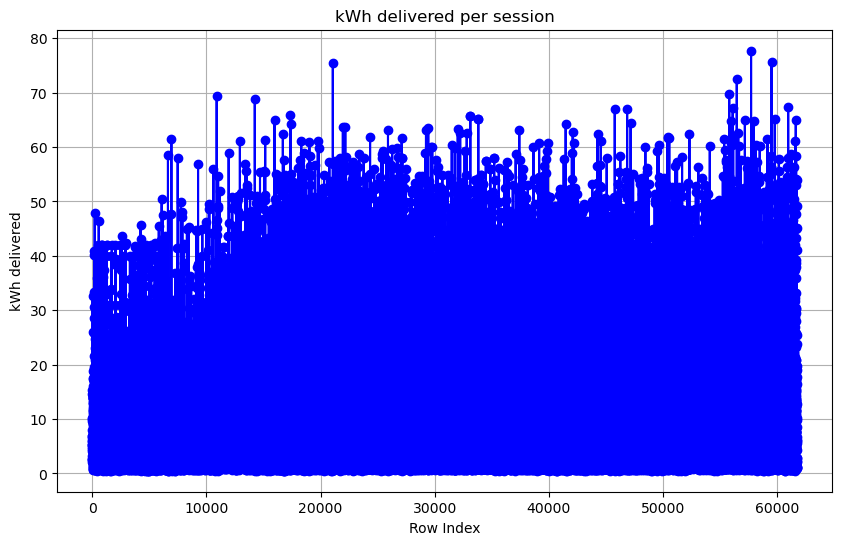

In [255]:
# Plot the differences in kWh delivery per session
plt.figure(figsize=(10, 6))
plt.plot(df_charging['kWhDelivered'], marker='o', linestyle='-', color='b')
#plt.plot(df_charging.index, df_charging['kWhDelivered'])
plt.title('kWh delivered per session')
plt.xlabel('Row Index')
plt.ylabel('kWh delivered')
plt.grid(True)
plt.show()

In [252]:
print(df_charging['kWhDelivered'].describe())

count    61731.000000
mean        11.589689
std         10.088103
min          0.501000
25%          5.082500
50%          8.991000
75%         13.991000
max         77.700000
Name: kWhDelivered, dtype: float64


### 4) Trade-off 'kWh requested' and 'kWh delivered'

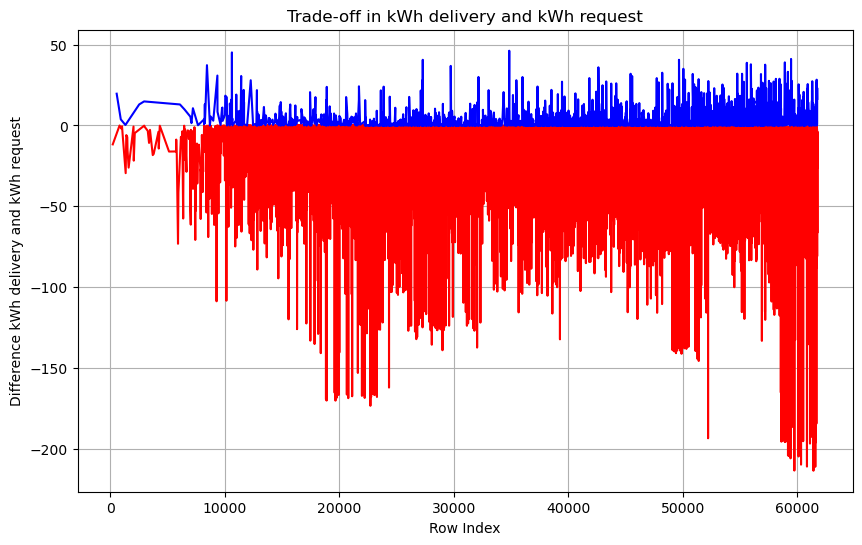

In [259]:
# Plot the difference in kWh request and kWh delivery (to show if requests have been fulfilled (positive, blue) or not (negative, red))
plt.figure(figsize=(10, 6))
#plt.scatter(df_charging[df_charging['user_kWhRequestFulfilment'] < 0].index, df_charging[df_charging['user_kWhRequestFulfilment'] < 0]['user_kWhRequestFulfilment'], color='red', label='bad')
#plt.scatter(df_charging[df_charging['user_kWhRequestFulfilment'] >= 0].index, df_charging[df_charging['user_kWhRequestFulfilment'] >= 0]['user_kWhRequestFulfilment'], color='blue', label='good')
plt.plot(df_charging[df_charging['user_kWhRequestFulfilment'] < 0].index, df_charging[df_charging['user_kWhRequestFulfilment'] < 0]['user_kWhRequestFulfilment'], color='red', label='bad')
plt.plot(df_charging[df_charging['user_kWhRequestFulfilment'] >= 0].index, df_charging[df_charging['user_kWhRequestFulfilment'] >= 0]['user_kWhRequestFulfilment'], color='blue', label='good')
plt.title('Trade-off in kWh delivery and kWh request')
plt.xlabel('Row Index')
plt.ylabel('Difference kWh delivery and kWh request')
plt.grid(True)
plt.show()

In [254]:
print(df_charging['user_kWhRequestFulfilment'].describe())

count    45550.000000
mean       -11.365717
std         16.433534
min       -213.686000
25%        -14.074750
50%         -6.350000
75%         -2.727250
max         46.281000
Name: user_kWhRequestFulfilment, dtype: float64
